# SCRAPING CAR INFO FROM A CAR WEBSITE

### Importing the required libraries

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

### Looping through pages of Data and using the requests  and BeautfulSoup libraries  to get html page content

In [25]:
#creates empty lists to store data
model = []
mileage = []
price = []
dealer = []
rating = []
reviews = []

#creates a for loop to move through pages and return its html content
for i in range(1,20):
    website = 'https://www.cars.com/shopping/results/?page=' + str(i) + '&page_size=20&list_price_max=&makes[]=bmw&maximum_distance=20&stock_type=all&zip='
    response = requests.get(website)
    soup = BeautifulSoup(response.content, 'html.parser')
    results = soup.findAll('div',{'class':"vehicle-card"})#vehicle card houses all neccessary info about the car
    
    for result in results:
        try:
            model.append(result.find('h2', {'class':"title"}).get_text())#gets the name of the car
        except:
            model.append('n/a')
            
            
        try:
            mileage.append(result.find('div', {'class':"mileage"}).get_text())#gets how much miles the car has moved(for used cars)
        except:
            mileage.append('n/a')
            
            
        try:
            price.append(result.find('span', {'class':"primary-price"}).get_text())#gets the price of the car
        except:
            price.append('n/a')
            
            
        try:
            dealer.append(result.find('div', {'class':"dealer-name"}).get_text().strip())#gets the person respondible for sale of car
        except:
            dealer.append('n/a')
            
            
        try:
            rating.append(result.find('span', {'class':"sds-rating__count"}).get_text())
        except:
            rating.append('n/a')
            
            
        try:
            reviews.append(result.find('span', {'class':"sds-rating__link sds-button-link"}).get_text())
        except:
            reviews.append('n/a')


## I created a dataframe out of the information

In [112]:
#creates a dataframe and use the data generated as columns
cars = pd.DataFrame({'Model' : model, 'Mileage' : mileage, 'Price' : price,
                                'Dealer' : dealer, 'Rating' : rating, 'Reviews' : reviews})
cars.head()

,Model,Mileage,Price,Dealer,Rating,Reviews
0,2023 BMW 540 i xDrive,n/a,"$72,420",BMW Seattle,4.8,(914 reviews)
1,2023 BMW X6 xDrive40i,n/a,"$83,405",Melbourne BMW,4.0,(66 reviews)
2,2018 BMW 340 i xDrive,"36,836 mi.","$34,998",CarMax Sanford - Now offering Curbside Pickup ...,3.2,(14 reviews)
3,2022 BMW X1 sDrive28i,"6,492 mi.","$39,999",Off Lease Only Orlando,4.9,"(28,171 reviews)"
4,2009 BMW 135 i,"51,230 mi.","$24,998",Quality Auto Center,4.5,(33 reviews)


In [113]:
cars.tail()

,Model,Mileage,Price,Dealer,Rating,Reviews
375,2021 BMW X5 sDrive40i,"21,095 mi.","$57,995",Don Mealey Chevrolet,4.7,(971 reviews)
376,1998 BMW 740 i,"83,670 mi.","$14,980",Fall Creek Motor Cars,4.5,(12 reviews)
377,2019 BMW 740 i,"32,839 mi.","$51,477",BMW North Scottsdale,4.6,(552 reviews)
378,2020 BMW X3 sDrive30i,"19,895 mi.","$41,997",BMW North Scottsdale,4.6,(552 reviews)
379,2019 BMW X5 xDrive40i,"18,942 mi.","$52,027",BMW of Orland Park,4.5,(617 reviews)


In [114]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Model    380 non-null    object
 1   Mileage  380 non-null    object
 2   Price    380 non-null    object
 3   Dealer   380 non-null    object
 4   Rating   380 non-null    object
 5   Reviews  380 non-null    object
dtypes: object(6)
memory usage: 17.9+ KB


In [115]:
#this code shows the data contains no duplicates
cars.duplicated().sum()

0

## Data Wrangling

*Here, i will be working on the columns and making them clean enough for analysis*

In [128]:
#removes the uneccessary text and brackets in the column
cars['Reviews'] = cars['Reviews'].apply(lambda x: x.strip('reviews)').strip('('))

cars['Reviews'] = cars['Reviews'].apply(lambda x: x.replace(",", ""))

cars['Reviews'] = cars['Reviews'].replace("n/a", np.nan)

cars['Reviews'] = cars[~(cars['Reviews'].isnull())].Reviews.astype(int)

### Cleaning Mileage Column

In [117]:
#removes the unit of measure from the column
cars['Mileage'] = cars['Mileage'].apply(lambda x: x.strip('mi.').replace(',', ''))

cars['Mileage'] = cars['Mileage'].replace("n/a", np.nan)

#line of code converts all non null values oin the column to a float data type
cars['Mileage'] = cars[~(cars['Mileage'].isnull())].Mileage.astype(int)

### Cleaning Price Column

In [118]:
#removes the unit of measure from the column
cars['Price'] = cars['Price'].apply(lambda x: x.strip('$').replace(",", ""))

cars['Price'] = cars['Price'].astype(int)

### Cleaning Rating Column

In [119]:
cars['Rating'] = cars['Rating'].replace("n/a", np.nan)

cars['Rating'] = cars['Rating'].astype(float)

cars['Rating'] = cars[~(cars['Rating'].isnull())].Rating.astype(float)

### Feature Enginnering

*Here, i aim to get the year the car was produced from the Model of the car*


In [137]:
#gets the year for each model of the car
cars['Year'] = cars['Model'].str[0:4]

In [140]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    380 non-null    object 
 1   Mileage  353 non-null    float64
 2   Price    380 non-null    int32  
 3   Dealer   380 non-null    object 
 4   Rating   371 non-null    float64
 5   Reviews  373 non-null    float64
 6   Year     380 non-null    object 
dtypes: float64(3), int32(1), object(3)
memory usage: 19.4+ KB


In [141]:
cars.head()

,Model,Mileage,Price,Dealer,Rating,Reviews,Year
0,2023 BMW 540 i xDrive,NaN,72420,BMW Seattle,4.8,914.0,2023
1,2023 BMW X6 xDrive40i,NaN,83405,Melbourne BMW,4.0,66.0,2023
2,2018 BMW 340 i xDrive,36836.0,34998,CarMax Sanford - Now offering Curbside Pickup ...,3.2,14.0,2018
3,2022 BMW X1 sDrive28i,6492.0,39999,Off Lease Only Orlando,4.9,28171.0,2022
4,2009 BMW 135 i,51230.0,24998,Quality Auto Center,4.5,33.0,2009


In [142]:
cars.to_csv('cars.csv', index = False)

## Exploratory Data Analysis

In [3]:
cars = pd.read_csv('cars.csv')

In [4]:
#check data types and info
cars.dtypes

Model       object
Mileage    float64
Price        int64
Dealer      object
Rating     float64
Reviews    float64
Year         int64
dtype: object

In [144]:
#check statistical facts of my data
cars.describe()

,Mileage,Price,Rating,Reviews
count,353.000000,380.000000,371.000000,373.000000
mean,40201.300283,44212.655263,4.451752,1320.927614
std,26201.574277,19865.062600,0.500071,3411.450829
min,2500.000000,6500.000000,2.100000,0.000000
25%,19895.000000,31292.000000,4.300000,100.000000
50%,34197.000000,41491.500000,4.600000,618.000000
75%,51415.000000,53984.500000,4.800000,1213.000000
max,200822.000000,126595.000000,5.000000,28171.000000


* The Average price of a car in this data is 44,212 dollars.
* The average rating given to a BMW car is 4.45 which is quite on the good side


In [145]:
#checks null values 
cars.isnull().sum()

Model       0
Mileage    27
Price       0
Dealer      0
Rating      9
Reviews     7
Year        0
dtype: int64

*The data shows that only 27 cars have no mileage covered with only 9 cars having no rating*

In [156]:
#this code groups the year by sum of the price of the cars and reviews and shows top 5 years by sum of price
cars.groupby(['Year'], sort = True)['Reviews', 'Price'].sum().sort_values(by = 'Price', ascending = False).head(5)

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_3268\2780567963.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cars.groupby(['Year'], sort = True)['Reviews', 'Price'].sum().sort_values(by = 'Price', ascending = False).head(5)


,Reviews,Price
Year,,
2019,135485.0,4570610
2020,76384.0,2982354
2021,91825.0,2714941
2022,53262.0,2000563
2018,70475.0,1820886


* *From the above results, it is clear that the year 2019 had the highest sum of car price*

*Is it that there are more cars in the Year 2019 compared to others? The next line of code aims to check this*

In [157]:
#checks the number of cars per year
cars['Year'].value_counts()

2019    102
2020     60
2021     48
2018     46
2022     27
2015     26
2017     15
2016     11
2013     11
2012     10
2014      7
2023      6
2011      4
2006      3
2010      2
2009      1
1998      1
Name: Year, dtype: int64

* *the information above shows that the year 2019 has the highest number of cars when compared to other years. However, there is no direct relationship between number of cars and the sum of prices as 2018 has more cars than 2022 but 2022 has the higher sum of the prices of cars*

*Now lets look at the year that featured the car with the highest worth relative to price*

In [161]:
#this code groups the year by highest worth cars and shows top 5 years by the most worthy car
cars.groupby(['Year'], sort = True)['Price'].max().sort_values(ascending = False).head(5)

Year
2022    126595
2020    112880
2021    110995
2019     90886
2017     83450
Name: Price, dtype: int32

* *From the data scraped, it is clear that the year 2022 happens to the year that has a BMW car with the highest price tag*

*From the website scraped, it shows that only used cars have mileage covered hence, our next line of code aims to look at how the year the car is produced affeect the mileage. I will be looking at the sum of milage for each year and observe the relationship between the two variables*

In [26]:
#getting the car with the highest price
cars[cars['Price'] == cars['Price'].max()]

,Model,Mileage,Price,Dealer,Rating,Reviews,Year
35,2022 BMW X6 M Base,NaN,126595,BMW of Bellevue,4.5,1581.0,2022


In [167]:
#this code groups the year by sum of the price of the cars and reviews and shows top 5 years by sum of price
cars[~(cars['Mileage'].isnull())].groupby(['Year'], sort = True)['Mileage', 'Price'].max().sort_values(by = 'Mileage', ascending = False)

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_3268\2895774343.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cars[~(cars['Mileage'].isnull())].groupby(['Year'], sort = True)['Mileage', 'Price'].max().sort_values(by = 'Mileage', ascending = False)


,Mileage,Price
Year,,
2013,200822.0,21000
2012,159845.0,35995
2014,112285.0,24995
2011,98241.0,29888
2015,96472.0,48495
2017,92956.0,83450
2006,89998.0,21995
2010,84107.0,12988
1998,83670.0,14980


* *Its is clear that for the data available, the maximum miles ,cars produced in the specified years, have gone is not linearly with how far behind the year is*

*The next line of code checks the correlation coefficient of each variable*

In [172]:
cars.corr()

,Mileage,Price,Rating,Reviews
Mileage,1.000000,-0.598900,-0.087289,-0.105508
Price,-0.598900,1.000000,0.167138,0.034319
Rating,-0.087289,0.167138,1.000000,0.211664
Reviews,-0.105508,0.034319,0.211664,1.000000


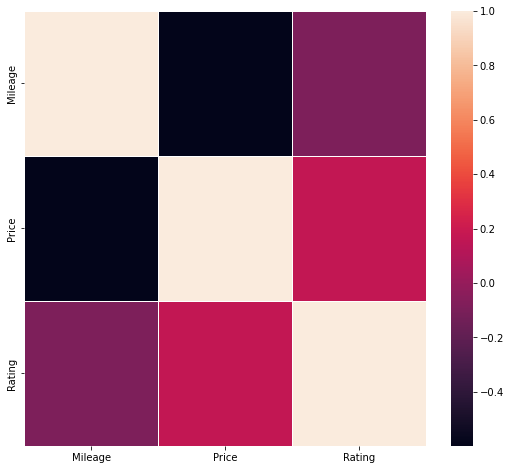

In [211]:
#creates a subset of the master dataframe for plotting the correlation heat map
df_corr = cars[['Mileage', 'Price', 
                               'Rating']]
fig = plt.subplots(figsize = (9,8))
correlation = df_corr.corr()#finds the correlation

#creates an heatmap to show the correlation between the variables selected
sb.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            ax=None,
            linewidth= 0.5);

*A quick look at the moderately negative correlation between `Price` and `Mileage`. This implies that for high prices, we have moderately low Mileage*

## Visualizations

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

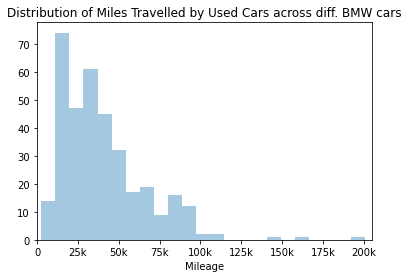

In [17]:
#this plots a density curve distribution of the miles covered by cars
sb.distplot(cars['Mileage'], kde = False)
plt.title('Distribution of Miles Travelled by Used Cars across diff. BMW cars');
ticks = [0,25e3, 50e3, 75e3, 100e3, 125e3 ,150e3, 175e3, 200e3];
labels = ['0','25k', '50k', '75k', '100k', '125k','150k', '175k', '200k'];

plt.xticks(ticks, labels);
plt.xlim(0, 205e3);

*Most BMW cars have mileage lesser than 25000 miles with the distribution been skewed to the right*

*Next, i look at the distribution of reatings and reviews*

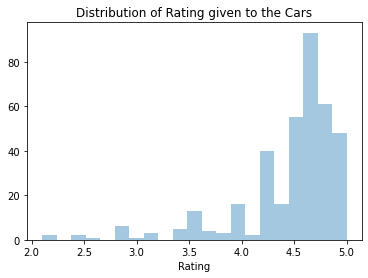

In [18]:
#distribution of ratings of BMW cars
sb.distplot(cars['Rating'], kde = False)
plt.title('Distribution of Rating given to the Cars');

*Notice how most of the cars from the data have very good ratings*

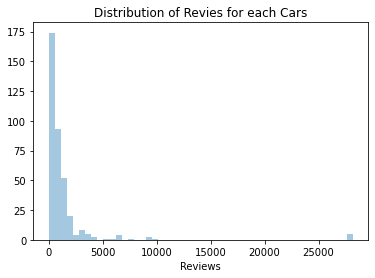

In [186]:
sb.distplot(cars['Reviews'], kde = False)
plt.title('Distribution of Revies for each Cars');

In [196]:
#defines a function that plots an histogram
def plot_func(column, title, binsize):#title is the proposed 
                                    #title of the chart and binsize specifies the size of the bins in the column
    bins = np.arange(cars[column].min(), cars[column].max()+binsize, binsize)

    cars[column].plot(kind = 'hist', figsize = (7,5), color = base_color, bins = bins);#plots a bar chart 
    
    plt.title(label = title, fontsize = 16);#prints the title 
    
    

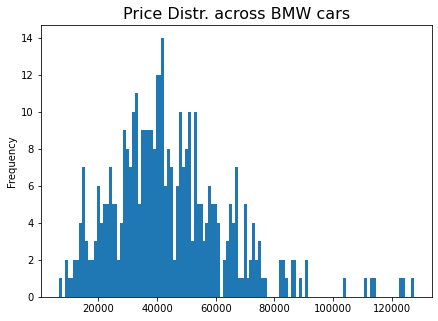

In [197]:
#called the function to plot a histogram for price
plot_func('Price', 'Price Distr. across BMW cars', 1000)

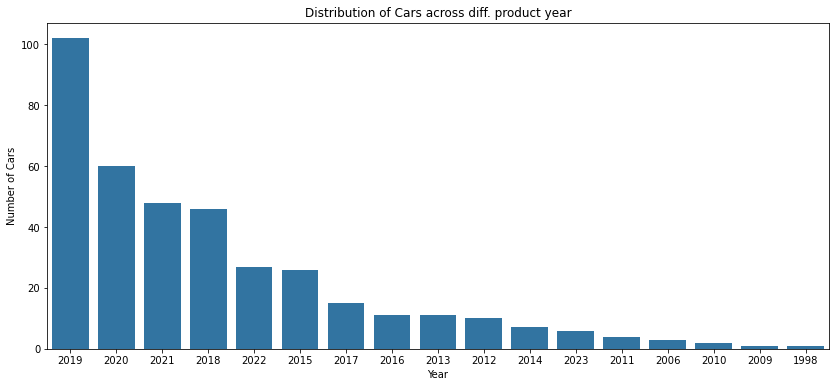

In [195]:
plt.figure(figsize = (14, 6))

#creates a bar chart reping the different number of cars across the years
order = cars['Year'].value_counts().index

base_color = sb.color_palette()[0]#set color to uniform
sb.countplot(data = cars, x = 'Year', color = base_color, order = order)
plt.title('Distribution of Cars across diff. product year');

plt.ylabel("Number of Cars");

*Notice how 2019 tops the year with the highest number of cars as previously stated*

## Bivariate Exploration

In [202]:
# the different categories of loan status available
statuses = ['2019','2020','2021','2018','2022','2015','2017','2016','2013','2012','2014','2023','2011','2006','2010','2009','1998']

# returns the ordered version
statuses = pd.api.types.CategoricalDtype(ordered=True, categories=statuses)

# Use pandas.astype() to convert the "LoanStatus" column from a plain object type into an ordered categorical type 
cars['Year'] = cars['Year'].astype(statuses);

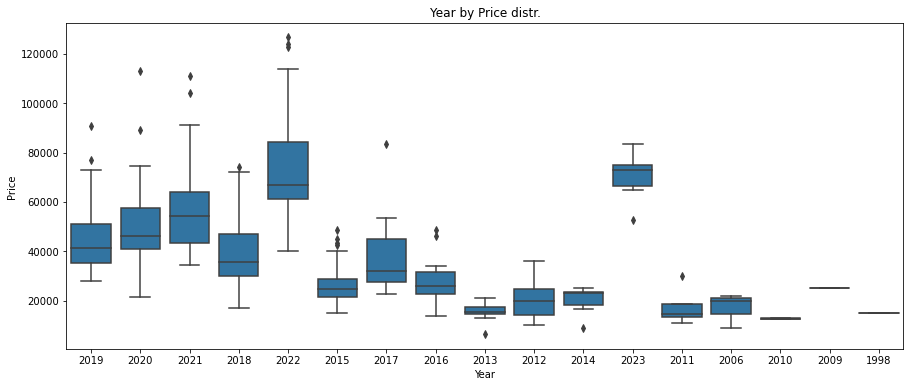

In [203]:
# Plotting a boxplot and using subplots 
plt.figure(figsize = [15, 6]) 

sb.boxplot(data=cars, x='Year', y='Price', 
              color = sb.color_palette()[0])
plt.title('Year by Price distr.');


*Notice how the median for year between 2018 and 2022 have higher median than all other years except the year 2023 which stands out*

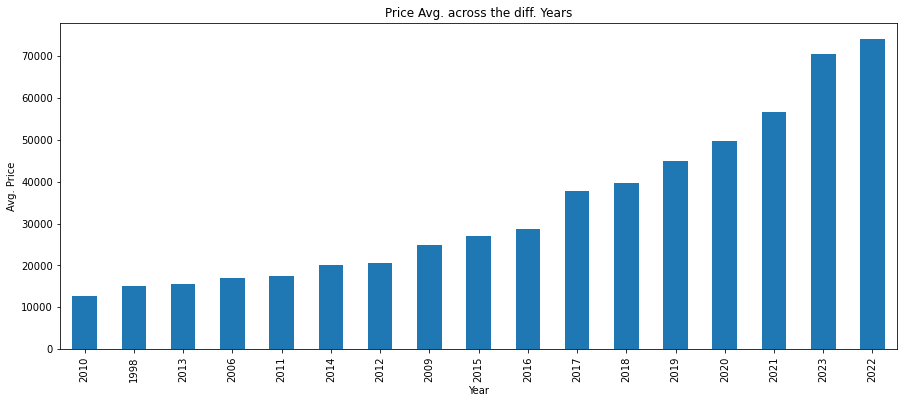

In [19]:
plt.figure(figsize = [15, 6]) 

#line of code to 
cars.groupby(['Year'])['Price'].mean().sort_values(ascending = True).plot(kind = 'bar');
plt.title('Price Avg. across the diff. Years');
plt.ylabel('Avg. Price');

*Here 2022 and 2023 stands out with high average prices when compared to other years*

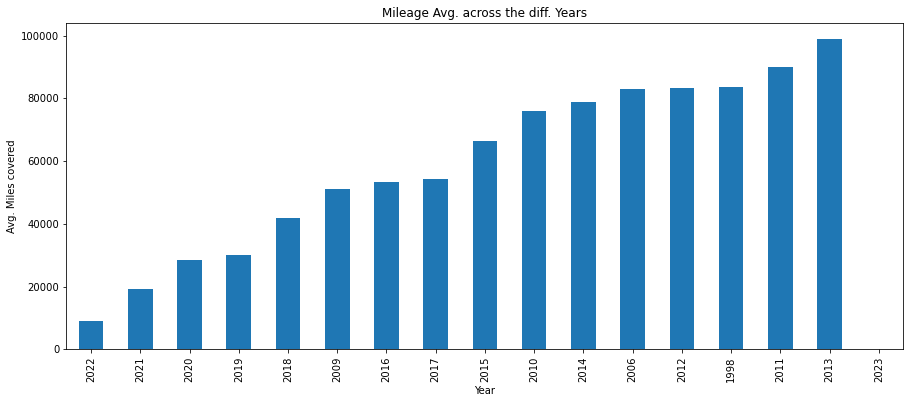

In [20]:
#line of code to plot a violin plot 
plt.figure(figsize = [15, 6]) 

#line of code to 
cars.groupby(['Year'])['Mileage'].mean().sort_values(ascending = True).plot(kind = 'bar');
plt.title('Mileage Avg. across the diff. Years');
plt.ylabel('Avg. Miles covered');

*Notica how no mileage were recorded for year as 2023 as there were no used cars in that year yet. 2013 has the cars with the high mileage. It is however clear that cars produced in years far behind have an higher average mileage when compred to the most recent years*

# Conclusions



> *My main interest of investigation was to find how the price and mileage is related with the year of production of the cars. I noticed that most of the cars produced in the year between 2017 and 2023 have higher average prices of cars. Number cars per year however does not affect the distribution as 2019 has more cars than 2022 but  2022 has the higher average as cars produce in this year seems to have high prices compared to 2019.It also became clear that cars produced in years far behind have an higher average mileage when compred to the most recent years*

# Limitations
>* the data is small to fully depend on its results

>* Any kind of hypothesis testing have not been performed, the basis of this analysis are historical data. Hence, any suggestion for future strategies should be based on a further analysis.